# 第 2 章 いろいろな分布とその解析

『はじめての確率論』（近代科学社、2011 年）読書ノート。

本章では有名な確率変数分布の確率関数・密度関数を見ていき、期待と分散を計算していく。
前章と同様に SymPy を活用していくが、数値計算では SciPy の `scipy.stats` モジュールを利用する。

## 2.1 二項分布

**二項分布**とは成功する確率が $p$ である試行を $n$ 回独立に反復するときの、成功する回数をあらわす確率変数分布である。

* 上のような試行を Bernoulli trials という。
* パラメーターが $n, p$ のふたつあるので確率関数を $B(n, p)$ のように表す。さらに 便宜上 $q = 1 - p$ とおく。

  $$
  \begin{align*}
  P(X = k) = B(n, p) = 
  \begin{pmatrix}
  n \\ k
  \end{pmatrix}
  p^k q^{n - k},
  \quad k = 0, 1, ..., n.
  \end{align*}
  $$
* この確率関数について $k$ についての総和をとると 1 になる。
* 二項分布の期待値がおもしろい。$B(n, p) = 1 = (p + q)^n$ の両辺を $p$ で微分すると勝手に出てくる。

  $$
  E[X] = np.
  $$

* 二項分布の分散の求め方も同様だが、期待値を先に計算しておく必要がある。
  $$
  V(X) = npq.
  $$


SymPy を使って分布関数、期待値、分散を観察してみよう。

In [52]:
from sympy import init_printing, And, S, symbols, simplify, factor
init_printing(use_latex=True)
from sympy.stats import density, cdf, E, P, variance as V

確率関数を確認してから分布関数を調べる。
確率分布オブジェクトを生成してからメソッド `pdf()` を呼び出すと確率関数らしきものが得られる。
分布関数を見るには関数 `cdf()` を使る。

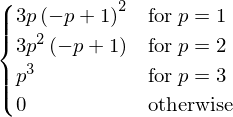

In [53]:
from sympy.stats import Binomial
n = S.One * 3
p = symbols('p', positive=True)
X = Binomial('X', n, p)
density(X).pdf(p)

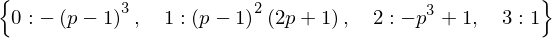

In [54]:
# cdf(X)
{k: simplify(v) for k, v in cdf(X).items()}

次に期待値と分散を見る。それぞれ関数 `E()` および `variance()` を用いる。

In [55]:
simplify(E(X))

In [56]:
simplify(V(X))

## 2.2 Poisson 分布

**Poisson 分布** とはまれにしか起こらない現象について大量のデータをとったときに、発生する現象の個数をあらわす分布である。

* 記号は本書と代えて $P(\lambda)$ としておく。母数 $\lambda$ は正であるものとする。

  $$
  P(X = k) = P(\lambda) = \frac{\mathrm{e}^{-\lambda} \lambda^k}{k!},\quad k = 0, 1, 2, ...
  $$
  
* これも $k$ に関する無限級数が 1 になる。
* 期待値と分散の求め方は、形式的に $\lambda$ について微分を考える数式変形によるものだ。

  $$
  \begin{align*}
  E[X] &= \lambda,\\
  V(X) &= \lambda.
  \end{align*}
  $$

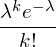

In [57]:
from sympy.stats import Poisson
la = symbols(r'\lambda', positive=True)
k = symbols('k', integer=True)
X = Poisson('X', la)
density(X).pdf(k)

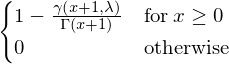

In [58]:
x = symbols('x')
simplify(cdf(X)(x))

In [59]:
simplify(E(X))

In [60]:
simplify(V(X))

## 2.3 二項分布の Poisson 近似

$B(n, p)$ において $p$ が十分小さい値であるとする。このとき、$n$ が十分大きければ Poisson 分布に近似できる。つまり、何か $p$ に収束する数列 $\{ p_n\}$ が、各項が $0 \lt p_n \lt 1$ となるようにとれて $n p_n \to \lambda\ (n \to \infty)$ のときに

$$
\lim_{n \to \infty} B(n, p_n) = P(\lambda).
$$

となる。

## 2.4 幾何分布

**幾何分布**とは離散的確率変数分布であって、

1. 成功する確率が $p\ (0 \lt p \lt 1)$ であるような試行を反復して、
2. 初めて成功するまでの失敗の回数を表す

ものだ。例によって便宜的に $q = 1 - p$ とおく（失敗する確率そのものだが）。

記号は本書と代えて $G(p)$ にしておく：
$$
P(X = k) = G(p) = p q^k,\quad k = 0, 1, ...
$$

期待値および分散の求め方は、$G(p)$ を $q$ で形式的に微分して式変形することで得られる。
$$
\begin{align*}
E[X] &= \frac{q}{p},\\
V(X) &= \frac{q}{p^2}.
\end{align*}
$$

## 2.5 First Success 分布

確率変数 $X$ が first success 分布に従うとは、確率変数 $X - 1$ が幾何分布 $G(p)$ に従うことと同じだ。

SymPy の `sympy.stats.Geometric` は実装を見ると first success 分布を表現しているようだ。

In [61]:
from sympy.stats import Geometric
p = symbols('p', positive=True)
#p = S.One / 3
X = Geometric('X', p)

In [62]:
k = symbols('k', natural=True)
density(X).pdf(k)

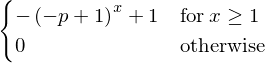

In [63]:
simplify(cdf(X)(x))

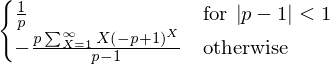

In [64]:
simplify(E(X))

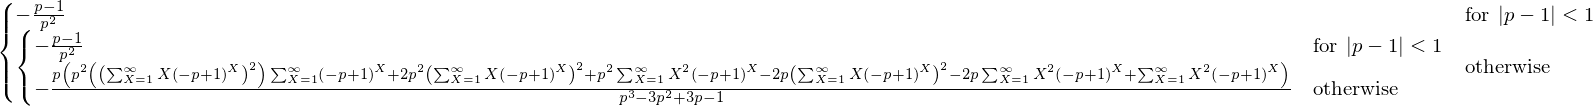

In [65]:
simplify(V(X))

## 2.6 負の二項分布

* 定義 2.1. 二項係数
  * 省略


* 定義 2.2. **負の二項係数**
  * 二項係数の $n$ の値が負であっても次の計算ができるので、そのように二項係数の定義を拡張したものを負の二項係数と呼ぶ。

    $$
    \begin{pmatrix}
    -n \\ k
    \end{pmatrix}
    = \frac{(-n)(-n-1)\dotsb(-n-k+1)}{k!},
    \quad n \in \mathbb{N},\ k \in \mathbb{N}.
    $$
  
* 負の二項係数により、二項展開がべき乗が負の場合にまで一般化できる。

**負の二項分布** とは負の二項係数で表現された二項分布である。記号は本書と代えて $NB(n, p)$ とする。この表記で $n \gt 0$ であることをうっかりしないように。

$$
  \begin{align*}
  P(X = k) = NB(n, p) = 
  \begin{pmatrix}
  n + k - 1\\ n - 1
  \end{pmatrix}
  p^k q^{n - k},
  \quad k = 0, 1, ..., n.
  \end{align*}
$$

* $n = 1$ の負の二項分布は幾何分布である：$NB(1, p) = G(p).$
* 期待値と分散は通常の二項分布と同様に求められる。

  $$
  \begin{align*}
  E[X] &= \frac{nq}{p},\\
  V(X) &= \frac{nq}{p^2}.
  \end{align*}
  $$

残念だが SymPy は負の二項分布を扱えないようだ。

## 2.7 一様分布

**一様分布**とは連続的確率変数の分布であり、ある区間で一様な密度を持つものをいう。
* 区間は有界でなくてもよい。
* 密度関数は区間を $[a, b]$ とすると次で表現される：

  $$
  f(x) = 
  \begin{cases}
  \dfrac{1}{b - a}, &\quad a \le x \le b\\
  0, &\quad \text{otherwise}.
  \end{cases}
  $$
  
* 分布関数は $f(x)$ の積分であり、区間内で単調な一次式だ。
* 期待値、分散は前章の要領で広義積分を計算して求める。

  $$
  \begin{align*}
  E[X] &= \dfrac{a + b}{2},
  V(X) &= \dfrac{(b - a)^2}{12}.
  \end{align*}
  $$

SymPy では `sympy.stats.Uniform` が一様分布クラスとして使える。

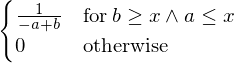

In [66]:
from sympy.stats import Uniform
a, b, x = symbols('a b x')
X = Uniform('X', a, b)
density(X)(x)

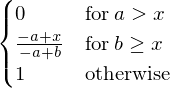

In [67]:
cdf(X)(x)

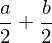

In [68]:
simplify(E(X))

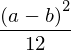

In [69]:
factor(V(X))

## 2.8 指数分布

**指数分布**とは連続的確率変数の分布であって、パラメーター $\lambda \gt 0$ を使った次のような密度関数で表されるものだ：
$$
f(x) =
\begin{cases}
\lambda \mathrm{e}^{-\lambda x},&\quad x \ge 0\\
0,&\quad \text{otherwise}.
\end{cases}
$$
* 窓口に客が来る時間間隔や、機械が故障してから修理されるまでの所要時間などを表すのに用いられる分布だ。
* 分布関数は $x \ge 0$ ならば次のようにして得られる（そうでないときはゼロ）：

  $$
  \begin{align*}
  F(x) &= \int_0^x\! \lambda \mathrm{e}^{-\lambda x}\,\mathrm{d}x\\
       &= 1 - \mathrm{e}^{-\lambda x}.
  \end{align*}
  $$
  
* 期待値は $\dfrac{1}{\lambda}$ だ。簡単な積分計算による。
* 分散は  $\dfrac{1}{\lambda^2}$ だ。

SymPy では `sympy.stats.Exponential`が クラスが指数分布を表現している。

In [70]:
from sympy.stats import Exponential
X = Exponential('X', la)
density(X)(x)

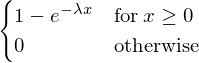

In [71]:
cdf(X)(x)

In [72]:
E(X)

In [73]:
V(X)

## 2.9 Cauchy 分布

**Cauchy 分布**とは連続的確率変数の分布であって、密度関数が次のように二つの正のパラメーター $\mu, \sigma$ で表されるものだ：

$$
C(\mu, \sigma) = \dfrac{\sigma}{\mu}\dfrac{1}{(x - \mu)^2 + \sigma^2}
$$

* 期待値を計算しようとすると積分が発散するので、存在しないものとして考えられる。したがって分散も存在しない。

In [74]:
from sympy.stats import Cauchy
from sympy.abc import mu, sigma
X = Cauchy('X', mu, sigma)

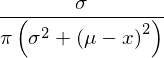

In [75]:
simplify(density(X)(x))

In [76]:
from sympy import integrate
integrate(density(X)(x), (x, -S.Infinity, S.Infinity))

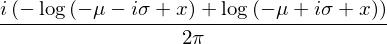

In [77]:
simplify(cdf(X)(x))

In [78]:
E(X)

In [79]:
V(X)

## 2.10 正規分布

**正規分布**とは連続的確率変数の分布であり、もっとも多く扱われているものだ。
期待値 $\mu$ と分散 $\sigma^2$ をパラメーターとして持つのが特徴であり、
特に $E[X] = 0,\ V(X) = 1$ のものを**標準正規分布**と呼ぶ。

標準正規分布 $N(0, 1)$ の密度関数は次で表される：
$$
g(x) = \dfrac{1}{\sqrt{2\pi}} \exp \left(-\frac{x^2}{2}\right).
$$

* この $g(x)$ の実数全体にわたる積分の値が 1 であることを見るのに重積分または複素数の正則関数の積分の知識がいるのだった。

一般の正規分布 $N(\mu, \sigma^2)$ の密度関数は次で表される：
$$
f(x) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp \left(-\frac{(x - \mu)^2}{2 \sigma^2}\right).
$$


* 分布関数は数値計算的に積分をしないと値がわからないようだ。
* 期待値と分散の値は前述のとおり。

In [80]:
from sympy.stats import Normal
mu = symbols(r'\mu')
sigma = symbols(r'\sigma', positive=True)
X = Normal('X', mu, sigma)

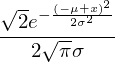

In [81]:
density(X)(x)

In [82]:
integrate(density(X)(x), (x, -S.Infinity, S.Infinity))

In [83]:
simplify(E(X))

In [84]:
simplify(V(X))

正規分布表の使い方については関数 $g(x)$ の解釈が基本。$X$ が $N(0, 1)$ に従うとき、
* 山の右側の面積＝左側の面積＝ $1/2$
* 分布関数との関係 $F(x) = P(X \le x)$

数値計算なら SciPy のほうがたぶん速いが、SymPy でも確率の計算はできる。

In [85]:
Z = Normal('Z', 0, 1)
P(Z <= 0)

In [86]:
for i in (1, 2, 3):
    print(f'{P(And(-i < Z, Z < i)).evalf():.4f}')

0.6827
0.9545
0.9973


正規分布表をプロットしておく。

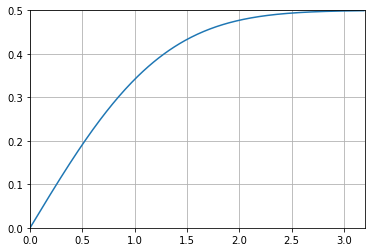

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

z = np.arange(0, 3.2, 0.01)
plt.grid()
plt.xlim(0, 3.2)
plt.ylim(0, 0.5)
plt.plot(z, stats.norm.cdf(z) - 0.5)

### 正規化
確率変数 $X$ が正規分布 $N(\mu, \sigma^2)$ に従っているとする。ここで確率変数を
$$
Z = \dfrac{X - \mu}{\sigma}
$$
と置換すると、$Z$ は $N(0, 1)$ に従う。この置換を**正規化**という。

受験模試の偏差値の話はこういうことだろう。
1. 採点を終えれば、受験生の得点の平均値（＝期待値）と分散が計算できる。それぞれ $\mu, \sigma^2$ とする。
2. 得点の分布は正規表現に従うものと仮定する。まったく勝手に仮定する。
3. 得点の確率変数を正規化することで次の性質が利用できるようになる：

   * ジャストで $\mu$ と同じ得点であれば、偏差値は 50 である。
   * もっというと得点および偏差は次のように正規化されている：
   
     $$
     Z = \dfrac{X - \mu}{\sigma},\quad
     V(Z) = 50 + \dfrac{10(X - \mu)}{\sigma}.
     $$
   
   * 前々ページの 68-95-99 ルール（この用語は別の本で知った）が偏差値帯 40-60, 30-70, 20-80 にそれぞれ適用される。

## 2.11 確率的在庫モデル

### 2.11.1 新聞売り子モデル

前半がモデルの説明というか設計で、後半が水着販売業者にモデルを適用する話だ。
前半の概略は次のようなものだ：

* 在庫費用 $h > 0$: 定数。
* 品切費用 $b > 0$: 定数。
* 需要量を表す確率変数 $D > 0$: 連続的とする。
  * 確率関数 $f(x)$
  * 分布関数 $F(x)$
* 仕入量 $s > 0$: これが変数だ。
* 総費用を表す確率変数 $C$

計算手順は次のようなものだ：

1. ここから $C$ を書き下す。

   $$
   C = h \max\{s - D, 0\} - b \min\{s - D, 0\}.
   $$

2. 期待値 $E[C]$ を書き下す。

   $$
   \begin{align*}
   E[C] &= E[h \max\{s - D, 0\} - b \min\{s - D, 0\}]\\
   &= h \int_0^\infty\! \max\{s - x, 0\} f(x)\,\mathrm{d}x - b \int_0^\infty\!\min\{s - x, 0\}f(x)\,\mathrm{d}x\\
   &= h \int_0^s\!(s - x)f(x)\,\mathrm{d}x - b\int_s^\infty\!(x - s)f(x)\,\mathrm{d}x.
   \end{align*}
   $$

3. その期待値を最小（極小）にするような $F$ または $f$ をとる $x$ を微分法で求める。

   期待値が積分の形で表されていることと、$f$ と $F$ の関係から導関数がすぐにわかるのがありがたい。
   
   $$
   \begin{align*}
   \frac{\mathrm{d} E[C]}{\mathrm{d}s} &= h F(s) - b(1 - F(s)),\\
   \frac{\mathrm{d}^2 E[C]}{\mathrm{d}s^2} &= (h + b) f(s).
   \end{align*}
   $$
   
  * 2 階導関数が非負であることからグラフが下に凸であることがわかる。
  * よって 1 階導関数の値をゼロにする $s = s_0$ が所望の値。このとき $F(s_0) = \dfrac{b}{b + h}.$
  
4. $F(s_0) = P(D \le s_0)$ だから……。

後半のやり方：

1. $N(100, 10^2)$ を正規化しておく。$Z = \dfrac{D - 100}{10}.$
2. 前半の議論の $b$ および $h$ に相当する値を求める。

   $$
   \begin{align*}
   h &= 25 - 10 = 15,\\
   b &= 75 - 20 = 50.
   \end{align*}
   $$

3. 前半の議論でいう $F(s_0)$ を求める。

   $$
   F(s_0) = \dfrac{b}{b + h} = \dfrac{50}{50 + 15} = 0.77
   $$

4. $P(0 \le Z \le z)$ の値から $z$ を求める。

   $$
   \begin{align*}
   P(0 \le Z \le z) &= P(Z < z) - P(Z < 0)\\ &= 0.77 - 0.5\\ &= 0.27
   \end{align*}
   $$
   
   正規表現表から N(0, 1) の値が 0.27 になる $z$ をさがすと
   だいたい 0.74 だと本書では言っている。

5. $z$ から $D$ を求める。

In [88]:
D = 0.74 * 10 + 100; D

6. $s_0$ を求める。

   107 か 108 が正解なわけだが、$P(D \le 107) < P(D \le s_0) < P(D \le 108)$ なので 108 を採用する。

### 2.11.2 座席割当モデル

* 残り一つの場合
  * $p$: 締切時間までに客がある確率
  * $r$: 割引率
  
  この場合には $p < r$ かどうかで割引販売を続行するかどうかを決定するのが妥当になる。


* 残りが複数の場合
  * $X$: 確率変数。タイムセール開始時間までの客の人数。
  * $r$: 割引率。先ほどと同じ仮定。
  * $\theta$: タイムセール開始時間までに売り手が確保する座席数。
  
  この場合には次のように考える。

  1. 正規価格座席を売り切った後に正規価格座席を求める客が来る確率を求める。
  
     この確率は $P(X \ge \theta + 1)$ と表される。
    
  2. 先程と同様の理屈で 1. の確率が割引率より小ならば割引販売を続行する。
  
     $P(X \ge \theta + 1) < r$ を満たす最小の $\theta$ を設定すればよい。
     

確率変数 $X$ が正規分布 $N(100, 10^2)$ に従うときの、割引率 $r = 0.8$ の切符に対する正規価格座席数 $\theta$ を求める。

1. 何はさておき正規化。

   $$
   Z = \frac{X - 100}{10}
   $$

2. 条件 $P(X \ge \theta + 1) < r$ を分析する。

   $$
   \begin{align*}
   P\left( X \ge \theta + 1\right)
   &= P \left( \dfrac{X - 100}{10} \ge \dfrac{(\theta + 1) - 100}{10}\right)\\
   &\lt 0.8
   \end{align*}
   $$
   
   ここまで変形してから $N(0, 1)$ 正規分布表が使える。
   $$0.8 - P(X < 0) = 0.3$$ であり、分布表でこの値をはさむものを検索すると（これは修練が必要だ。分布の山の対称性とか符号とかの発想に）
   
   $$
   \begin{align*}
   P(-0.85 < Z) &= .8023\\
   P(-0.84 < Z) &= .7995
   \end{align*}
   $$
   
   がわかる。
   
   今回の事例では「分布山の積分区間の下端を求める」ことが目的であり、
   0.8 つまり「0.5 より大きい値で抑えられている」という評価から、
   分布表を負に変換して探すのだ。
   
   * SciPy を使うならば `norm.isf(0.8)` で `-0.8416...` がすぐに得られる。

3. $\theta$ を求める。

   不等式 $\dfrac{(\theta + 1) - 100}{10} \ge -0.84$ が得られたので、これを解く。
   $\theta = 91.$
   
  

## 練習問題

### 1. 二項分布

二項分布の確率は離散的な値の和である。ゆえに $P(X \le 2) = \displaystyle \sum_{k = 0}^2 P(X = k)$ でよい。

SciPy で求めるには次のように `scipy.stats.binom` を用いる。あとは確率関数と分布関数のどちらを利用してもよい。題意により適うのは後者。

In [89]:
from scipy import stats

k = (0, 1, 2)
sum(stats.binom.pmf(k, 6, 1/2))

In [90]:
k = 2
stats.binom.cdf(2, 6, 1/2)

### 2. Poisson 分布

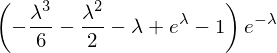

In [91]:
from sympy.stats import Poisson
la = symbols(r'\lambda', positive=True)
X = Poisson('X', la)
simplify(P(X > 3))

### 3. 正規分布

$N(1, 4)$ に従う確率変数 $X$ に関する性質を $N(0, 1)$ 正規分布表に基づいて答えるのが趣旨。

1. $N(1, 4) = N(1, 2^2) = N(\mu, \sigma^2)$ ということで期待値、分散、標準偏差はそれぞれ $1, 4, 2$ だ。
2. 何はさておき正規化。
   $$
   Z = \frac{X - \mu}{\sigma} = \frac{X - 1}{2}.
   $$
3. 正規分布表から各確率を求める。倍化や符号処理に注意しながら行う。

   1. 座席割当問題で変形した要領で $P(X < 2) = P(Z < 0.5)$ だから、山左プラス表の $0.50$ の値を計算して答えは $0.6915$ となる。
   2. $P(X > 4) = P(Z > 1.5)$ より、山右マイナス $P(0 < Z < 1.5)$ を計算する。
   3. $|X| > 3$ ということは $X > 3$ または $X < -3$ である。
   
      1. $P(X > 3) = P(Z > 1)$ について、確率は右山引く $P(0 < Z < 1)$ で求めて、
      2. $P(X < -3) = P(Z < -2)$ については左を右で考えて、右山引く $P(0 < Z < 2)$ で求める。
      3. 「または」なので確率を加える。この和が求めるものだ。
      
SciPy を使うと左とか右とか気にせずに計算できる：

In [92]:
from scipy.stats import norm
X = norm(0, 1)
X.cdf(0.5)

In [93]:
1 - X.cdf(1.5)

In [94]:
(1 - X.cdf(1)) + X.cdf(-2)